In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!python -version

Unknown option: -e
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [22]:
! pip install chembl_webresource_client # Bioactivity data from ChEMBL DB

In [23]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# This peice of code searches for "acetylcholinesterase" keyword in ChEM
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Drosophila melanogaster,Acetylcholinesterase,18.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
1,[],Homo sapiens,Acetylcholinesterase,16.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
2,[],Torpedo californica,Acetylcholinesterase,16.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
3,[],Mus musculus,Acetylcholinesterase,16.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090
4,[],Rattus norvegicus,Acetylcholinesterase,16.0,False,CHEMBL3199,"[{'accession': 'P37136', 'component_descriptio...",SINGLE PROTEIN,10116
5,[],Electrophorus electricus,Acetylcholinesterase,16.0,False,CHEMBL4078,"[{'accession': 'O42275', 'component_descriptio...",SINGLE PROTEIN,8005
6,[],Bos taurus,Acetylcholinesterase,16.0,False,CHEMBL4768,"[{'accession': 'P23795', 'component_descriptio...",SINGLE PROTEIN,9913
7,[],Bemisia tabaci,AChE2,16.0,False,CHEMBL2366409,"[{'accession': 'B3SST5', 'component_descriptio...",SINGLE PROTEIN,7038
8,[],Leptinotarsa decemlineata,Acetylcholinesterase,16.0,False,CHEMBL2366490,"[{'accession': 'Q27677', 'component_descriptio...",SINGLE PROTEIN,7539
9,[],Nephotettix cincticeps,Ace-orthologous acetylcholinesterase,16.0,False,CHEMBL2366514,"[{'accession': 'Q9NJH6', 'component_descriptio...",SINGLE PROTEIN,94400


In [ ]:
# we will be working with HOMOSapiens Acetylcholinesterase, so select the 1st entry
selected_target = targets.target_chembl_id[1]
selected_target

'CHEMBL220'

In [ ]:
#we are selecting only the type "IC50" out of other standardr types as seen in the cell below
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")
data_list = list(res)
df = pd.DataFrame(data_list)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,46.0
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,1.71
9413,None,None,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,10.0


In [ ]:
# all data for the selected target to looka at unique valuees for standard type
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target)
data_list = list(res)
df_all = pd.DataFrame(data_list)

In [ ]:
df_all['standard_type'].unique()

array(['Inhibition', 'IC50', 'kinact', 'T1/2', 'Activity', 'Ki', 'Km',
       'Kcat', 'Kcat/Km', 'EC50', 'Ratio', 'Kd'], dtype=object)

In [ ]:
df['standard_type'].unique()

array(['IC50'], dtype=object)

In [ ]:
# save to be able to load the dataframe directly in the next session to save time
df.to_csv('/content/drive/MyDrive/CDD/acetyl_standard_type_ic50.csv', index=False)

In [ ]:
! head /content/drive/MyDrive/CDD/data/acetyl_standard_type_ic50.csv

head: cannot open '/content/drive/MyDrive/CDD/data/acetyl_standard_type_ic50.csv' for reading: No such file or directory


In [24]:
df = pd.read_csv('/content/drive/MyDrive/CDD/data/acetyl_standard_type_ic50.csv')
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,46.00
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.71
9413,NaN,NaN,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.00


In [25]:
# Check for missing values
df.isnull().sum()

,0
action_type,7893
activity_comment,8075
activity_id,0
activity_properties,0
assay_chembl_id,0
assay_description,0
assay_type,0
assay_variant_accession,9415
assay_variant_mutation,9415
bao_endpoint,0


In [26]:
# the standard value is the concentration of the drug that is related to its potency.
# the lower the value, the lower dosage it takes to inhibit the protein by 50 % (IC50), so better. Check missing values in this column.
print(f"{df['standard_value'].isnull().sum()} missing standard values")
print(f"{((df['standard_value'].isnull().sum())/df.shape[0]) * 100} % missing standard value")
print(f"{df['canonical_smiles'].isnull().sum()} missing cannonical values")
print(f"{((df['canonical_smiles'].isnull().sum())/df.shape[0]) * 100} % missing cannonical value")

1285 missing standard values
13.648433351035582 % missing standard value
36 missing cannonical values
0.38236856080722254 % missing cannonical value


In [27]:
# the standard value is the concentration of the drug that is related to its potency.
# the lower the value, the lower dosage it takes to inhibit the protein by 50 % (IC50), so better.
# so, as standard value is the important column and incorrect imputation could result in negative outcome, we work on it by removing low number of missing value column (13%)
df = df[df.standard_value.notna()]
df = df[df.canonical_smiles.notna()]
print(df['standard_value'].isnull().sum())
print(df['canonical_smiles'].isnull().sum())

0
0


In [28]:
len(df.canonical_smiles.unique())

6642

In [29]:
df2 = df.drop_duplicates(['canonical_smiles'])
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.75
1,NaN,NaN,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.10
2,NaN,NaN,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,50.00
3,NaN,NaN,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.30
4,NaN,NaN,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25724873,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,46.00
9411,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25724874,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5391657,Inhibition of Acetylcholinesterase (unknown or...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,38.31
9412,"{'action_type': 'INHIBITOR', 'description': 'N...",NaN,25733694,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,1.71
9413,NaN,NaN,25733695,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5393547,Inhibition of recombinant human AChE expressed...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.00


In [30]:
# we label the compounds as "inactive ( > 10000 nM/1uM)", "intermediate( 1000nm > 10000nM or 1um > 10uM)", and "active"( < 1000 nM/1uM) based on the standard_value as follows:
bioactivity_class = []
for i in df.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [31]:
# extract useful columns
df2 = df[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]
df2['bioactivity_class'] = bioactivity_class
df2

<ipython-input-31-7a4bab21fef7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bioactivity_class'] = bioactivity_class


,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
9410,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive
9411,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive
9412,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate
9413,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive


In [32]:
df2.to_csv('/content/drive/MyDrive/CDD/data/preprocessed_acetyl_standard_type_ic50.csv', index=False)

**EDA**

In [33]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/CDD/data/preprocessed_acetyl_standard_type_ic50.csv')

In [34]:
! pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 30.5 MB/s eta 0:00:00


In [35]:
import sys
sys.path.append('/usr/local/lib/python3.10/site-packages/')

In [36]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive


In [37]:
# remove mixtures or salts identified by string after "."
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [38]:
drop_init_smiles = df.drop(columns='canonical_smiles')
df_final = pd.concat([drop_init_smiles,smiles], axis=1)
df_final

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
8123,CHEMBL5398421,46000.0,inactive,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2
8124,CHEMBL11298,38310.0,inactive,N[C@@H](CO)C(=O)O
8125,CHEMBL5395312,1710.0,intermediate,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...
8126,CHEMBL5399112,10000.0,inactive,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...


Lipinski descriptors, also known as the Lipinski's Rule of Five, are a set of molecular properties used to evaluate the drug-likeness of small molecules. They are widely used in computational drug discovery to predict whether a compound is likely to be an orally active drug in humans.

Lipinski's Rule of Five
The rule states that, in general, an orally active drug has the following characteristics:

Molecular weight (MW):
Less than or equal to 500 Da.

LogP (Partition Coefficient):
The calculated octanol-water partition coefficient (LogP) should be ≤ 5, indicating moderate lipophilicity.

Hydrogen bond donors (HBD):
The molecule should have ≤ 5 hydrogen bond donors, i.e., the number of NH and OH groups.

Hydrogen bond acceptors (HBA):
The molecule should have ≤ 10 hydrogen bond acceptors, i.e., the number of oxygen and nitrogen atoms.

Purpose
These rules are used to filter compounds during drug discovery to ensure good oral bioavailability.
Molecules violating more than one of these rules are less likely to be orally active.


In [39]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [40]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) # get moelecular structure from SMILES
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:       # extract properties from each molecular structure

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [41]:
df_lipinski = lipinski(df_final.canonical_smiles)

In [42]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,312.325,2.8032,0.0,6.0
1,376.913,4.5546,0.0,5.0
2,426.851,5.3574,0.0,5.0
3,404.845,4.7069,0.0,5.0
4,346.334,3.0953,0.0,6.0
...,...,...,...,...
8123,301.298,2.0110,4.0,6.0
8124,105.093,-1.6094,3.0,3.0
8125,401.474,2.9571,3.0,5.0
8126,387.447,2.6149,4.0,5.0


In [43]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,46000.0,inactive,301.298,2.0110,4.0,6.0
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,38310.0,inactive,105.093,-1.6094,3.0,3.0
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,1710.0,intermediate,401.474,2.9571,3.0,5.0
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,10000.0,inactive,387.447,2.6149,4.0,5.0


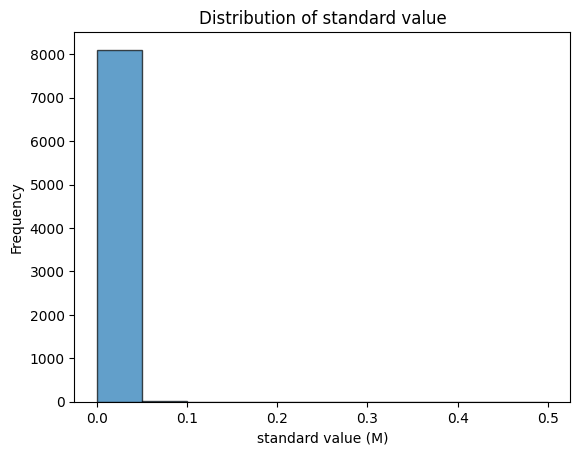

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of the column
plt.hist(df_combined['standard_value']*10e-9, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('standard value (M)')
plt.ylabel('Frequency')
plt.title('Distribution of standard value')
plt.show()

In [45]:
df_combined['standard_value'].describe()

,standard_value
count,8.128000e+03
mean,9.621716e+04
std,9.840917e+05
min,0.000000e+00
25%,1.000000e+02
50%,1.504500e+03
75%,1.240000e+04
max,5.000000e+07


In [46]:
# to account for the un-uniform distribution, it's a common practice to use -log transformation to IC50 values.
# start by capping very high value to avoid numberical instability
import numpy as np

def process_IC50(input):
    # Normalize the 'standard_value' column in case there are high values
    norm = []
    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000  # Cap the value at 100,000,000 (100 million)
        norm.append(i)

    input['standard_value_norm'] = norm

    # Convert to pIC50
    pIC50 = []
    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Convert nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50

    # Drop the original 'standard_value' column
    x = input.drop('standard_value', axis=1)
    x = x.drop('standard_value_norm', axis=1)

    return x



In [47]:
df_final_i = df_combined[df_combined['standard_value'] != 0]

In [48]:
df_final_i['standard_value'].describe()

,standard_value
count,8.127000e+03
mean,9.622900e+04
std,9.841517e+05
min,5.000000e-06
25%,1.000000e+02
50%,1.509000e+03
75%,1.240000e+04
max,5.000000e+07


In [49]:
df_final = process_IC50(df_final_i)

<ipython-input-46-0e4a42ad81fe>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm
<ipython-input-46-0e4a42ad81fe>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['pIC50'] = pIC50


In [50]:
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,5.767004
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


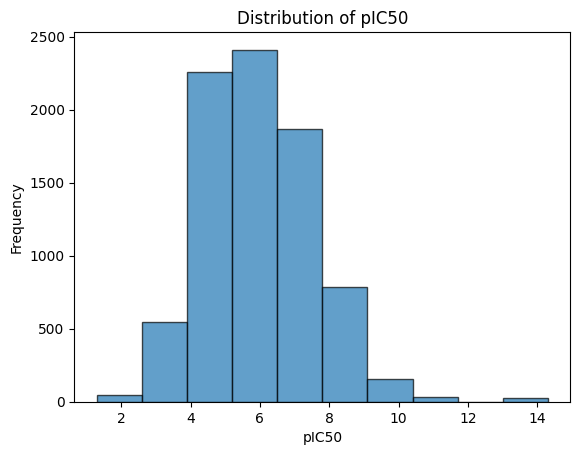

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of the column
plt.hist(df_final['pIC50'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.title('Distribution of pIC50')
plt.show()

**EDA or Chemical Space Analysis**

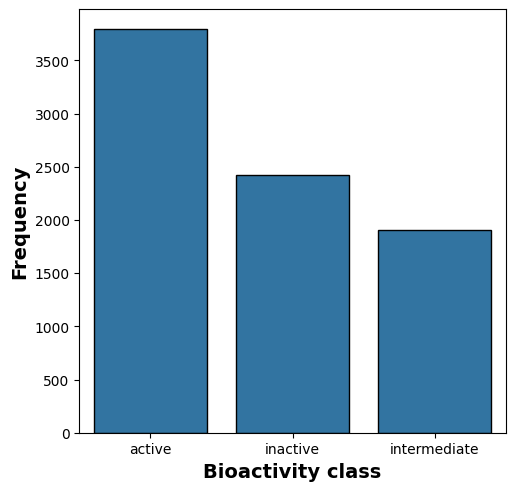

In [ ]:
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_acetyl_bioactivity_class.pdf')

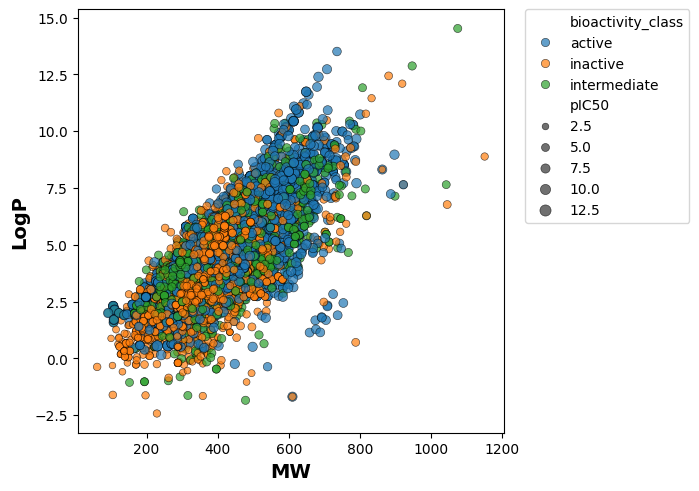

In [ ]:
# solubility of molecules

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/acetyl_plot_MW_vs_LogP.pdf')

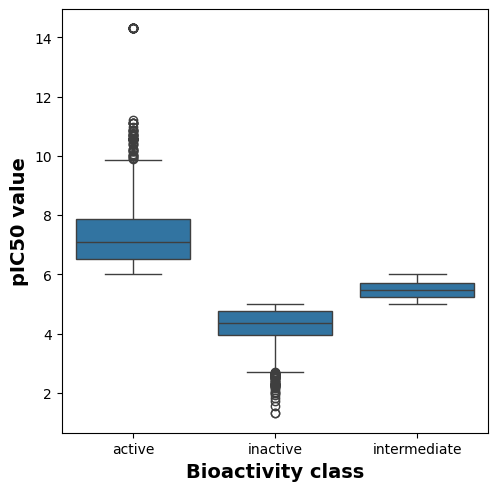

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/acetyl_plot_ic50.pdf')

In [ ]:
# we will work only with the active and inactive groups to test the distribution difference between them in terms of the molecular descriptors
df_final_1 = df_final[df_final.bioactivity_class != 'intermediate']
df_final_1

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8122,CHEMBL5435795,O=Cc1ccc2n1CCc1cc(O)c(O)cc1C2,inactive,243.262,1.8587,2.0,4.0,4.233810
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


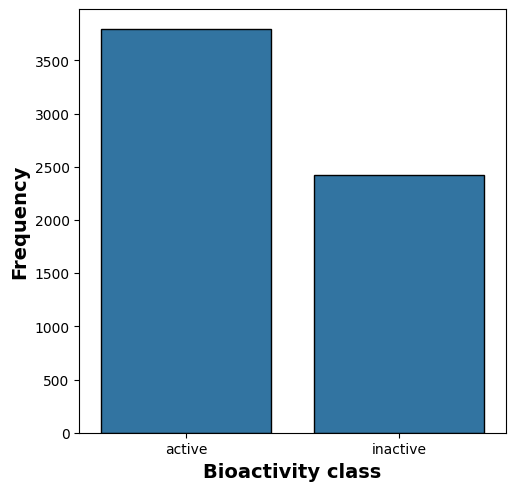

In [ ]:
import seaborn as sns
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_final_1, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_bioactivity_class.pdf')

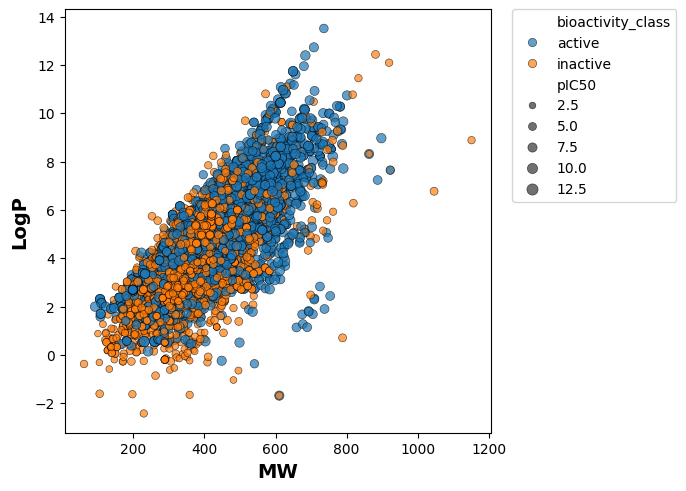

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_final_1, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_MW_vs_LogP.pdf')

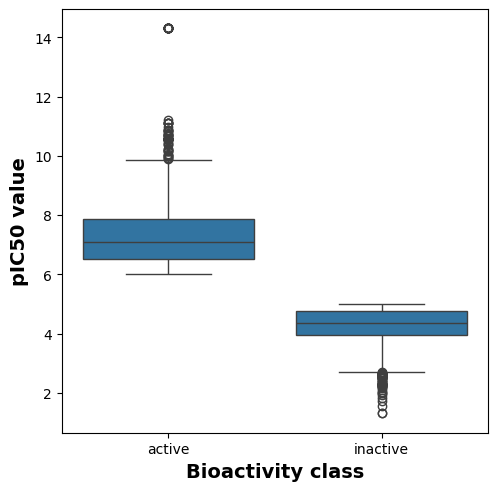

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_final_1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_ic50.pdf')

In [ ]:
# we do a statisitical test (Mann-Whitney test) to test the distribution difference between them in terms of each moelecular descriptor
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_final_1[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_final_1[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,9203184.0,0.0,0.05,Different distribution (reject H0)


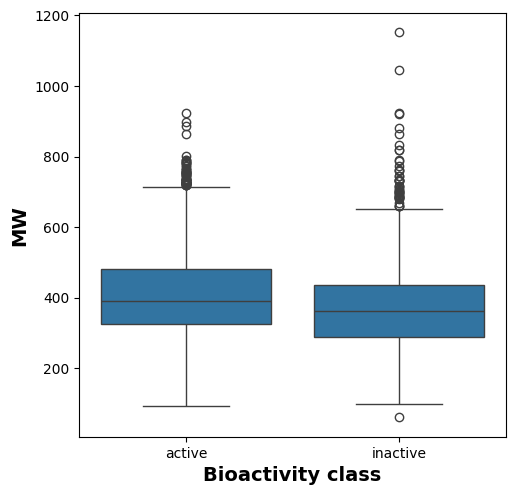

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_final_1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,5382809.0,1.155707e-29,0.05,Different distribution (reject H0)


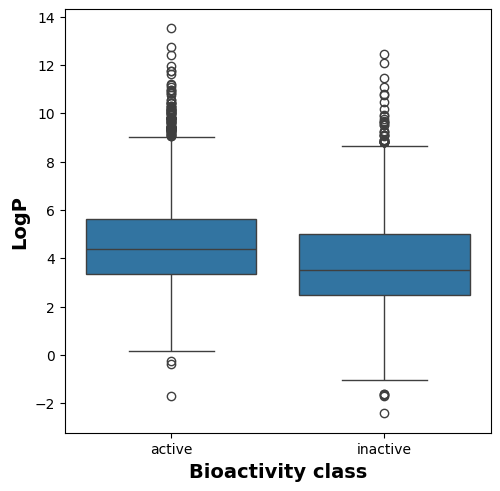

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_final_1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,5778786.5,3.842837e-65,0.05,Different distribution (reject H0)


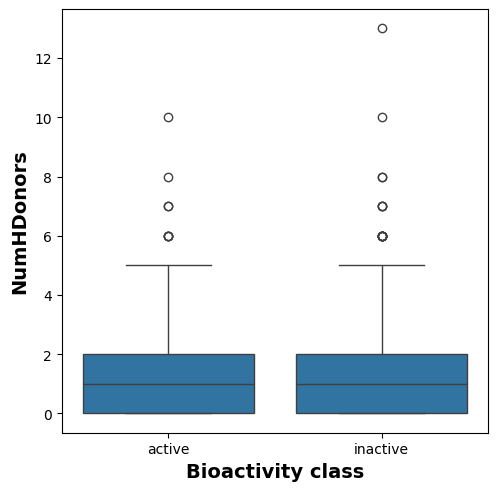

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_final_1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,4979928.5,7.032845e-09,0.05,Different distribution (reject H0)


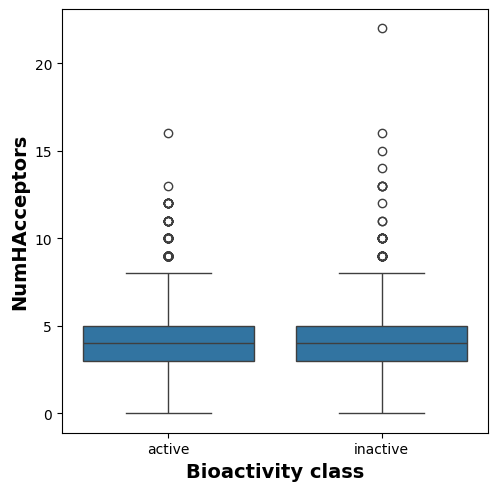

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_final_1)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('/content/drive/MyDrive/CDD/EDA_plots/plot_2_acetyl_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,4581438.0,0.766739,0.05,Same distribution (fail to reject H0)


* Summary from box plots and the test: The test for NumHAcceptors is the only one that shows that there is no significant distribution difference while the other 3 descriptors show the difference in distribution between active and inactive that is statistically significant.

**MOLECULAR DESCRIPTOR DATASET PREPARATION USING PaDEL (Parallel Application for Descriptor and Fingerprint Calculation) DESCRIPTOR**

In [ ]:
! unzip /content/drive/MyDrive/CDD/padel.zip

Archive:  /content/drive/MyDrive/CDD/padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-

In [51]:
# work with the 3-class dataset prepared earlier
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
8123,CHEMBL5398421,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,inactive,301.298,2.0110,4.0,6.0,4.337242
8124,CHEMBL11298,N[C@@H](CO)C(=O)O,inactive,105.093,-1.6094,3.0,3.0,4.416688
8125,CHEMBL5395312,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,intermediate,401.474,2.9571,3.0,5.0,5.767004
8126,CHEMBL5399112,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,inactive,387.447,2.6149,4.0,5.0,5.000000


In [ ]:
 # we will be working with the molecule_chembl_id and canonical_smiles columns to calculate descriptors
df_final_selected = df_final[['canonical_smiles','molecule_chembl_id']]
df_final_selected.to_csv('/content/drive/MyDrive/CDD/data/acetyl_molecule.smi', sep='\t', index=False, header=False)

In [ ]:
df_final_selected

,canonical_smiles,molecule_chembl_id
0,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,CHEMBL133897
1,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,CHEMBL336398
2,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,CHEMBL131588
3,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,CHEMBL130628
4,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,CHEMBL130478
...,...,...
8123,COc1cc(O)c2c(c1)C(=O)c1cc(O)c(O)cc1CCN2,CHEMBL5398421
8124,N[C@@H](CO)C(=O)O,CHEMBL11298
8125,CN1CCN(c2ccc(C(=O)Nc3cc(-c4nc5ccccc5[nH]4)n[nH...,CHEMBL5395312
8126,O=C(Nc1cc(-c2nc3ccccc3[nH]2)n[nH]1)c1ccc(N2CCN...,CHEMBL5399112


In [ ]:
# use padel.sh file to generate the descriptors after cleaning the chemical structures based on the instructions.
! cat /content/drive/MyDrive/CDD/padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir /content/drive/MyDrive/CDD/data/ -file /content/drive/MyDrive/CDD/data/padel_descriptors_output.csv


In [ ]:
! bash /content/drive/MyDrive/CDD/padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL1087180 in acetyl_molecule.smi (3051/8127). Average speed: 1.17 s/mol.
Processing CHEMBL1087131 in acetyl_molecule.smi (3053/8127). Average speed: 1.17 s/mol.
Processing CHEMBL1915760 in acetyl_molecule.smi (3055/8127). Average speed: 1.17 s/mol.
Processing CHEMBL1915761 in acetyl_molecule.smi (3056/8127). Average speed: 1.17 s/mol.
Processing CHEMBL1098479 in acetyl_molecule.smi (3058/8127). Average speed: 1.17 s/mol.
Processing CHEMBL1915764 in acetyl_molecule.smi (3060/8127). Average speed: 1.17 s/mol.
Processing CHEMBL460969 in acetyl_molecule.smi (3062/8127). Average speed: 1.17 s/mol.
Processing CHEMBL1915765 in acetyl_molecule.smi (3064/8127). Average speed: 1.16 s/mol.
Processing CHEMBL12089 in acetyl_molecule.smi (3066/8127). Average speed: 1.16 s/mol.
Processing CHEMBL1916766 in acetyl_molecule.smi (3068/8127). Average speed: 1.16 s/mol.
Processing CHEMBL1916770 in acetyl_molecule.smi (3070/8127). Average spe

**PREPARE DATA FOR TRAINING**

In [52]:
df_padel_x = pd.read_csv('/content/drive/MyDrive/CDD/data/padel_descriptors_output.csv')

In [53]:
df_padel_x #with pubchem fingerprints which corresponds to each property of a compound. Shares similarity with one hot encoding

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL336398,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL133897,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL131588,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL130628,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL130478,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,CHEMBL11298,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8123,CHEMBL5398421,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8124,CHEMBL5395312,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8125,CHEMBL5402411,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_padel_x.drop(columns=['Name'], inplace=True)
df_padel_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8122,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8123,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8124,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8125,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df_padel_y = df_final['pIC50']
df_padel_y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
8123,4.337242
8124,4.416688
8125,5.767004
8126,5.000000


In [56]:
pd.concat([df_padel_x, df_padel_y], axis=1).to_csv('/content/drive/MyDrive/CDD/data/acetyl_padel_descriptors_XY.csv', index=False)

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

thresholds = list(np.arange(0.01, 0.2, 0.01))
best_threshold = None
best_score = -np.inf  # Initialize best_score with negative infinity for comparison

for threshold in thresholds:
    try:
        selection = VarianceThreshold(threshold=threshold)
        X_transformed = selection.fit_transform(df_padel_x)  # Apply fit_transform to entire data

        # Proceed if there are features left after transformation
        if X_transformed.shape[1] == 0:
            print(f"No features meet the threshold of {threshold}. Skipping...")
            continue

        # Split the transformed data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, df_padel_y, test_size=0.2, random_state=42)

        # Perform cross-validation using RandomForest (on training data)
        model = RandomForestRegressor(n_estimators=500)
        model.fit(X_train, Y_train)
        r2 = model.score(X_test, Y_test)
        print(r2)
        # If the current threshold gives a better score, update best_score
        if r2 > best_score:
            best_score = r2
            best_threshold = threshold

    except ValueError as e:
        print(f"Error for threshold {threshold}: {e}")
        continue

print(f"Best Threshold: {best_threshold}, Best Mean R2 Score: {best_score}")



0.4953330411075292
0.4877453083927821
0.48664865325776785
0.48590040709058224
0.48442768092221977
0.481069277104093
0.48583187717176857
0.4907836227241402
0.494930406250075
0.4920670601094872
0.49640317739023776
0.49554714430394786
0.49584293516696787
0.491193075811173
0.488811652567659
0.4787863497900242
0.48205021876849496
0.48358040667986746
0.48107475256481946
Best Threshold: 0.11, Best Mean R2 Score: 0.49640317739023776


In [62]:
#using the best values to get to the best results
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold= 0.11)
selection.fit(df_padel_x)
X = df_padel_x[df_padel_x.columns[selection.get_support(indices=True)]]

In [66]:
X.to_csv('/content/drive/MyDrive/CDD/data/acetyl_padel_selected_descriptors.csv', index=False)

In [65]:
 X.shape # 881-196 features with variance less than 0.15 were removed

(8127, 196)

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df_padel_y, test_size=0.2, random_state=42)

In [68]:
model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.4954134166347518

In [69]:
Y_pred = model.predict(X_test)

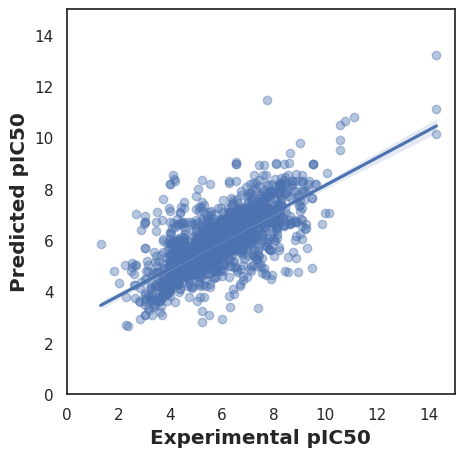

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.figure.set_size_inches(5, 5)
plt.show()

**USE LAZYPREDICT TO COMPARE MULTIPLE MODEL SCORES**

In [71]:
! pip install lazypredict

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [74]:
# Remove low variance features using the value calculated above
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=0.11)
X = selection.fit_transform(df_padel_x)
X.shape

(8127, 196)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, df_padel_y, test_size=0.2, random_state=42)

In [ ]:
# lazypredict for multiple models at once
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
model_train, prediction_test = clf.fit(X_train, X_test, Y_train, Y_test)

 98%|█████████▊| 41/42 [07:58<00:03,  3.53s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 6501, number of used features: 458
[LightGBM] [Info] Start training from score 5.969478


100%|██████████| 42/42 [07:59<00:00, 11.42s/it]


In [ ]:
prediction_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.32,0.51,1.08,4.62
LGBMRegressor,0.32,0.51,1.08,1.20
RandomForestRegressor,0.30,0.50,1.10,28.39
NuSVR,0.26,0.47,1.13,14.52
SVR,0.25,0.46,1.14,17.95
BaggingRegressor,0.25,0.46,1.14,2.61
KNeighborsRegressor,0.25,0.46,1.14,0.55
GradientBoostingRegressor,0.17,0.40,1.20,9.93
MLPRegressor,0.16,0.40,1.21,15.33


In [ ]:
model_train, prediction_train = clf.fit(X_train, X_train, Y_train, Y_train)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


 98%|█████████▊| 41/42 [13:03<00:05,  5.39s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1374
[LightGBM] [Info] Number of data points in the train set: 6501, number of used features: 458
[LightGBM] [Info] Start training from score 5.969478


100%|██████████| 42/42 [13:04<00:00, 18.67s/it]


In [ ]:
prediction_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.83,0.84,0.63,0.59
ExtraTreeRegressor,0.83,0.84,0.63,0.56
ExtraTreesRegressor,0.83,0.84,0.63,41.66
GaussianProcessRegressor,0.83,0.84,0.63,489.90
RandomForestRegressor,0.79,0.81,0.70,28.21
BaggingRegressor,0.78,0.79,0.72,2.92
MLPRegressor,0.76,0.78,0.75,15.61
HistGradientBoostingRegressor,0.62,0.65,0.94,4.99
LGBMRegressor,0.62,0.64,0.95,1.01


Text(0.5, 1.0, 'R-Squared Scores for Predictions on Training Data')

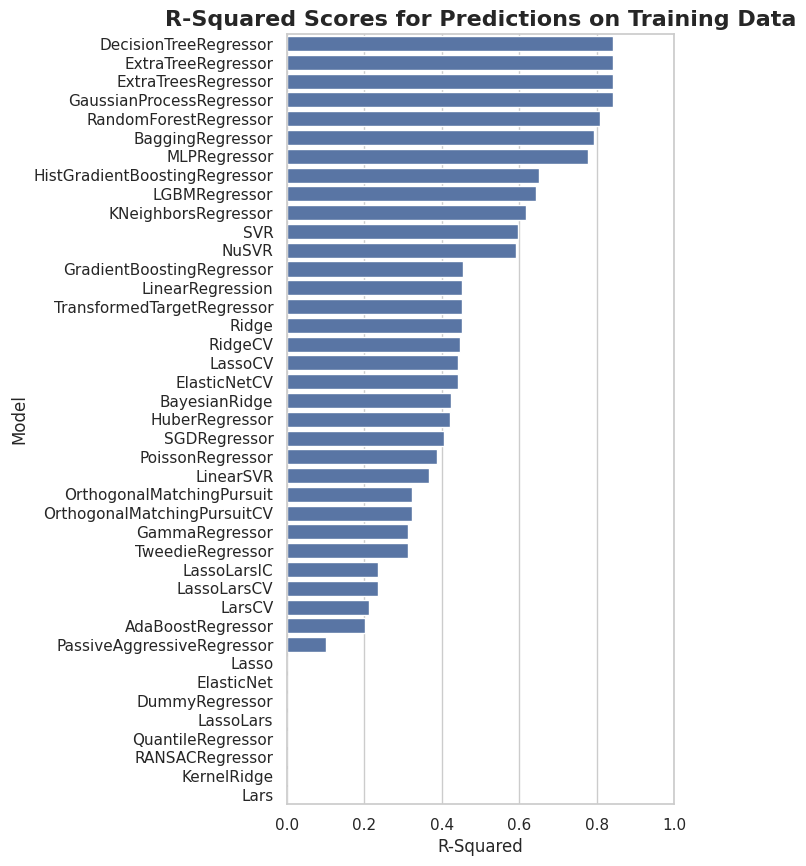

In [ ]:
# Bar plot of R-squared values for prediction train
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train.index, x="R-Squared", data=prediction_train)
ax.set(xlim=(0, 1))
ax.set_title("R-Squared Scores for Predictions on Training Data", fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'R-Squared Scores for Predictions on Testing Data')

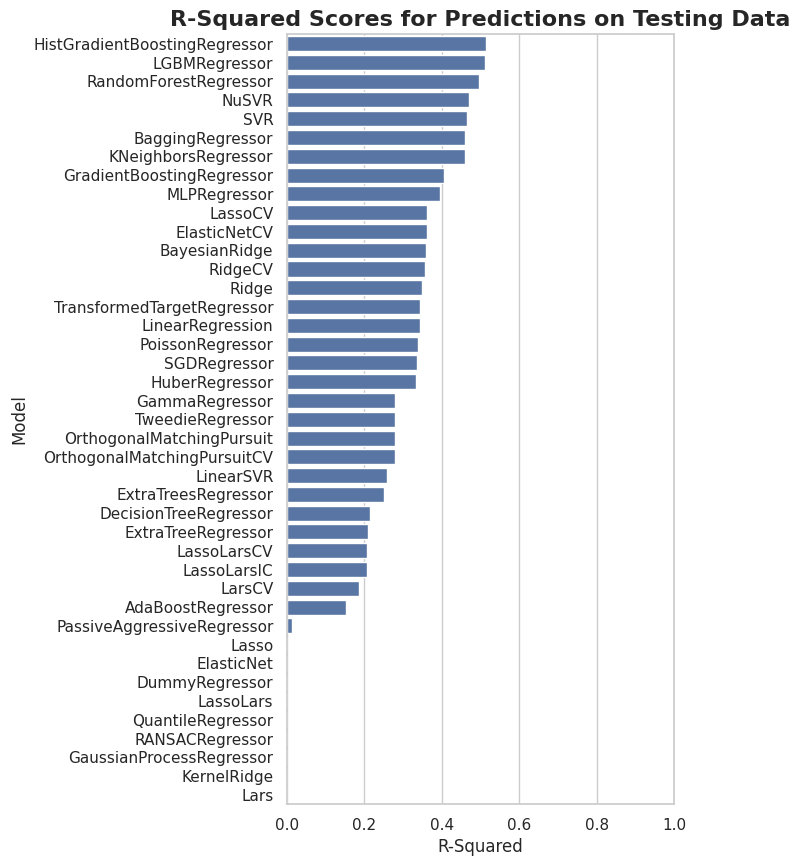

In [ ]:
# Bar plot of R-squared values for prediction test
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=test.index, x="R-Squared", data=test)
ax.set(xlim=(0, 1))
ax.set_title("R-Squared Scores for Predictions on Testing Data", fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'RMSE Scores for Predictions on Training Data')

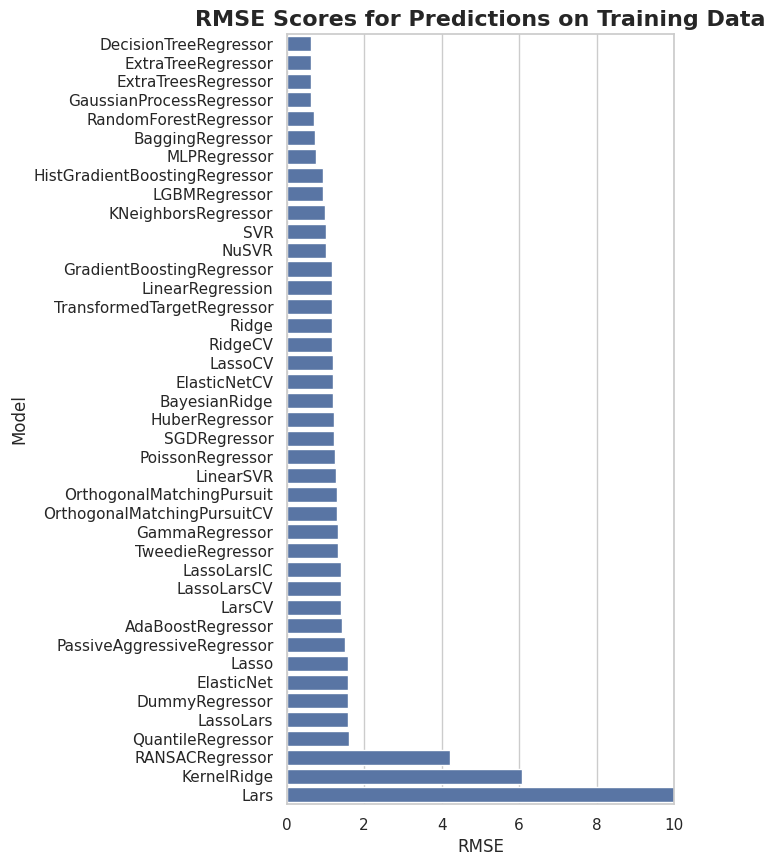

In [ ]:
# Bar plot of RMSE values for prediction train
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=prediction_train.index, x="RMSE", data=prediction_train)
ax.set(xlim=(0, 10))
ax.set_title("RMSE Scores for Predictions on Training Data", fontsize=16, fontweight='bold')

Text(0.5, 1.0, 'RMSE Scores for Predictions on Testing Data')

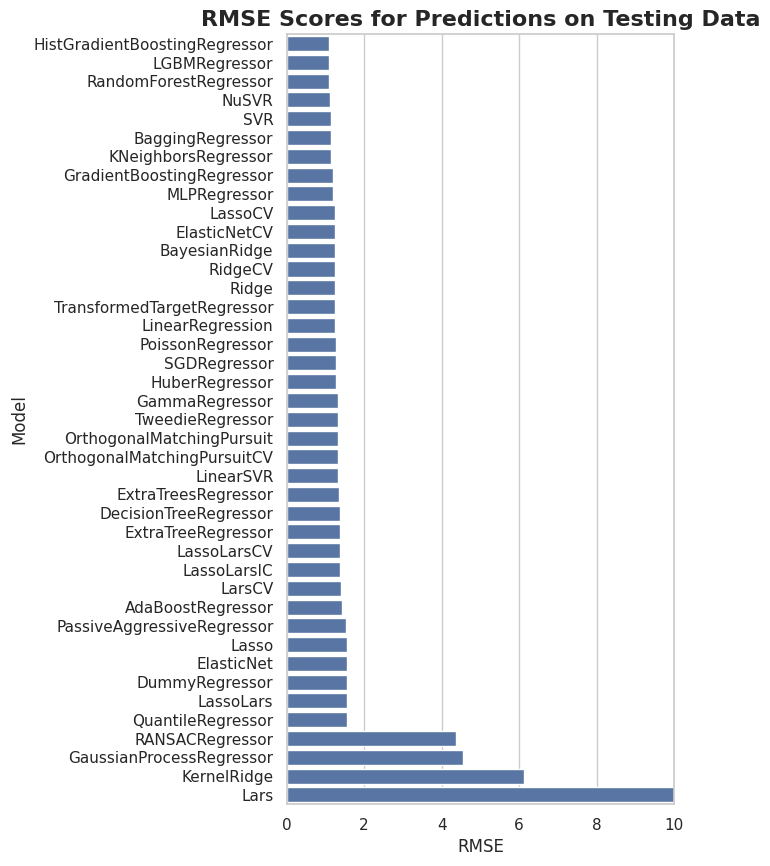

In [ ]:
# Bar plot of RMSE values for prediction test
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=test.index, x="RMSE", data=test)
ax.set(xlim=(0, 10))
ax.set_title("RMSE Scores for Predictions on Testing Data", fontsize=16, fontweight='bold')

**LAZYPREDICT IS A QUICK WAY TO COMPARE MODEL PERFORMANCE. IT DOESN'T ACCOUNT FOR HYPERPARAMETER TUNING, WHICH CAN FURTHER BE DONE TO INCREASE THE PERFORMANCE OF EACH MODEL.**

**WE WILL GO AHEAD AND RE-TRAIN THE RANDOM FOREST MODEL WITH MORE NUMBER OF ESTIMATORS AND SAVE THE MODEL TO BUILD AN APP**

In [75]:
selection = VarianceThreshold(threshold=0.11)
X_transformed = selection.fit_transform(df_padel_x)  # Apply fit_transform to entire data

# Split the transformed data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, df_padel_y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=500)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
print(r2)

0.4949018756799477


**THE SCORE CAN FURTHER BE IMPROVED BUT THE GOAL OF THIS PROJECT IS TO UNDERSTAND EDA AND ML IN COMPUTATIONAL DRUG DEVELOPMENT TASK. SO WE GO AHEAD AND SAVE THE MODEL TO BUILD AN APP**

In [76]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/CDD/model/acetyl_model.pkl', 'wb'))

In [77]:
pd.__version__

'2.2.2'